In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *

In [2]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Performing EDA

In [3]:
df = df.drop('model',axis=1)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


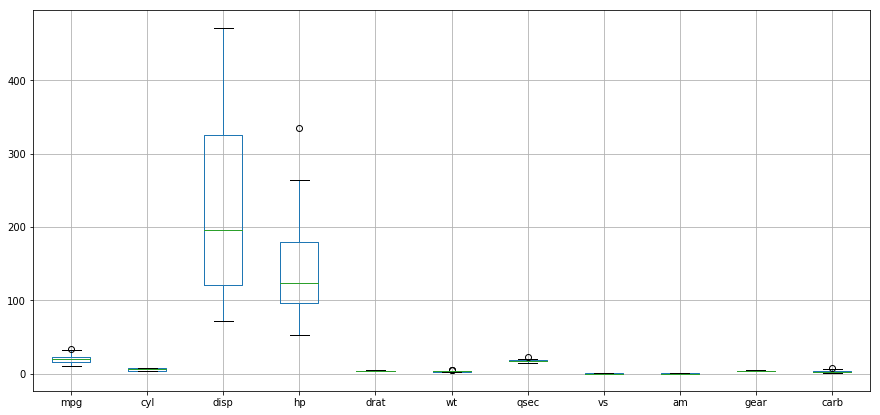

In [20]:
plt.figure(figsize=(15,7))
df.boxplot()

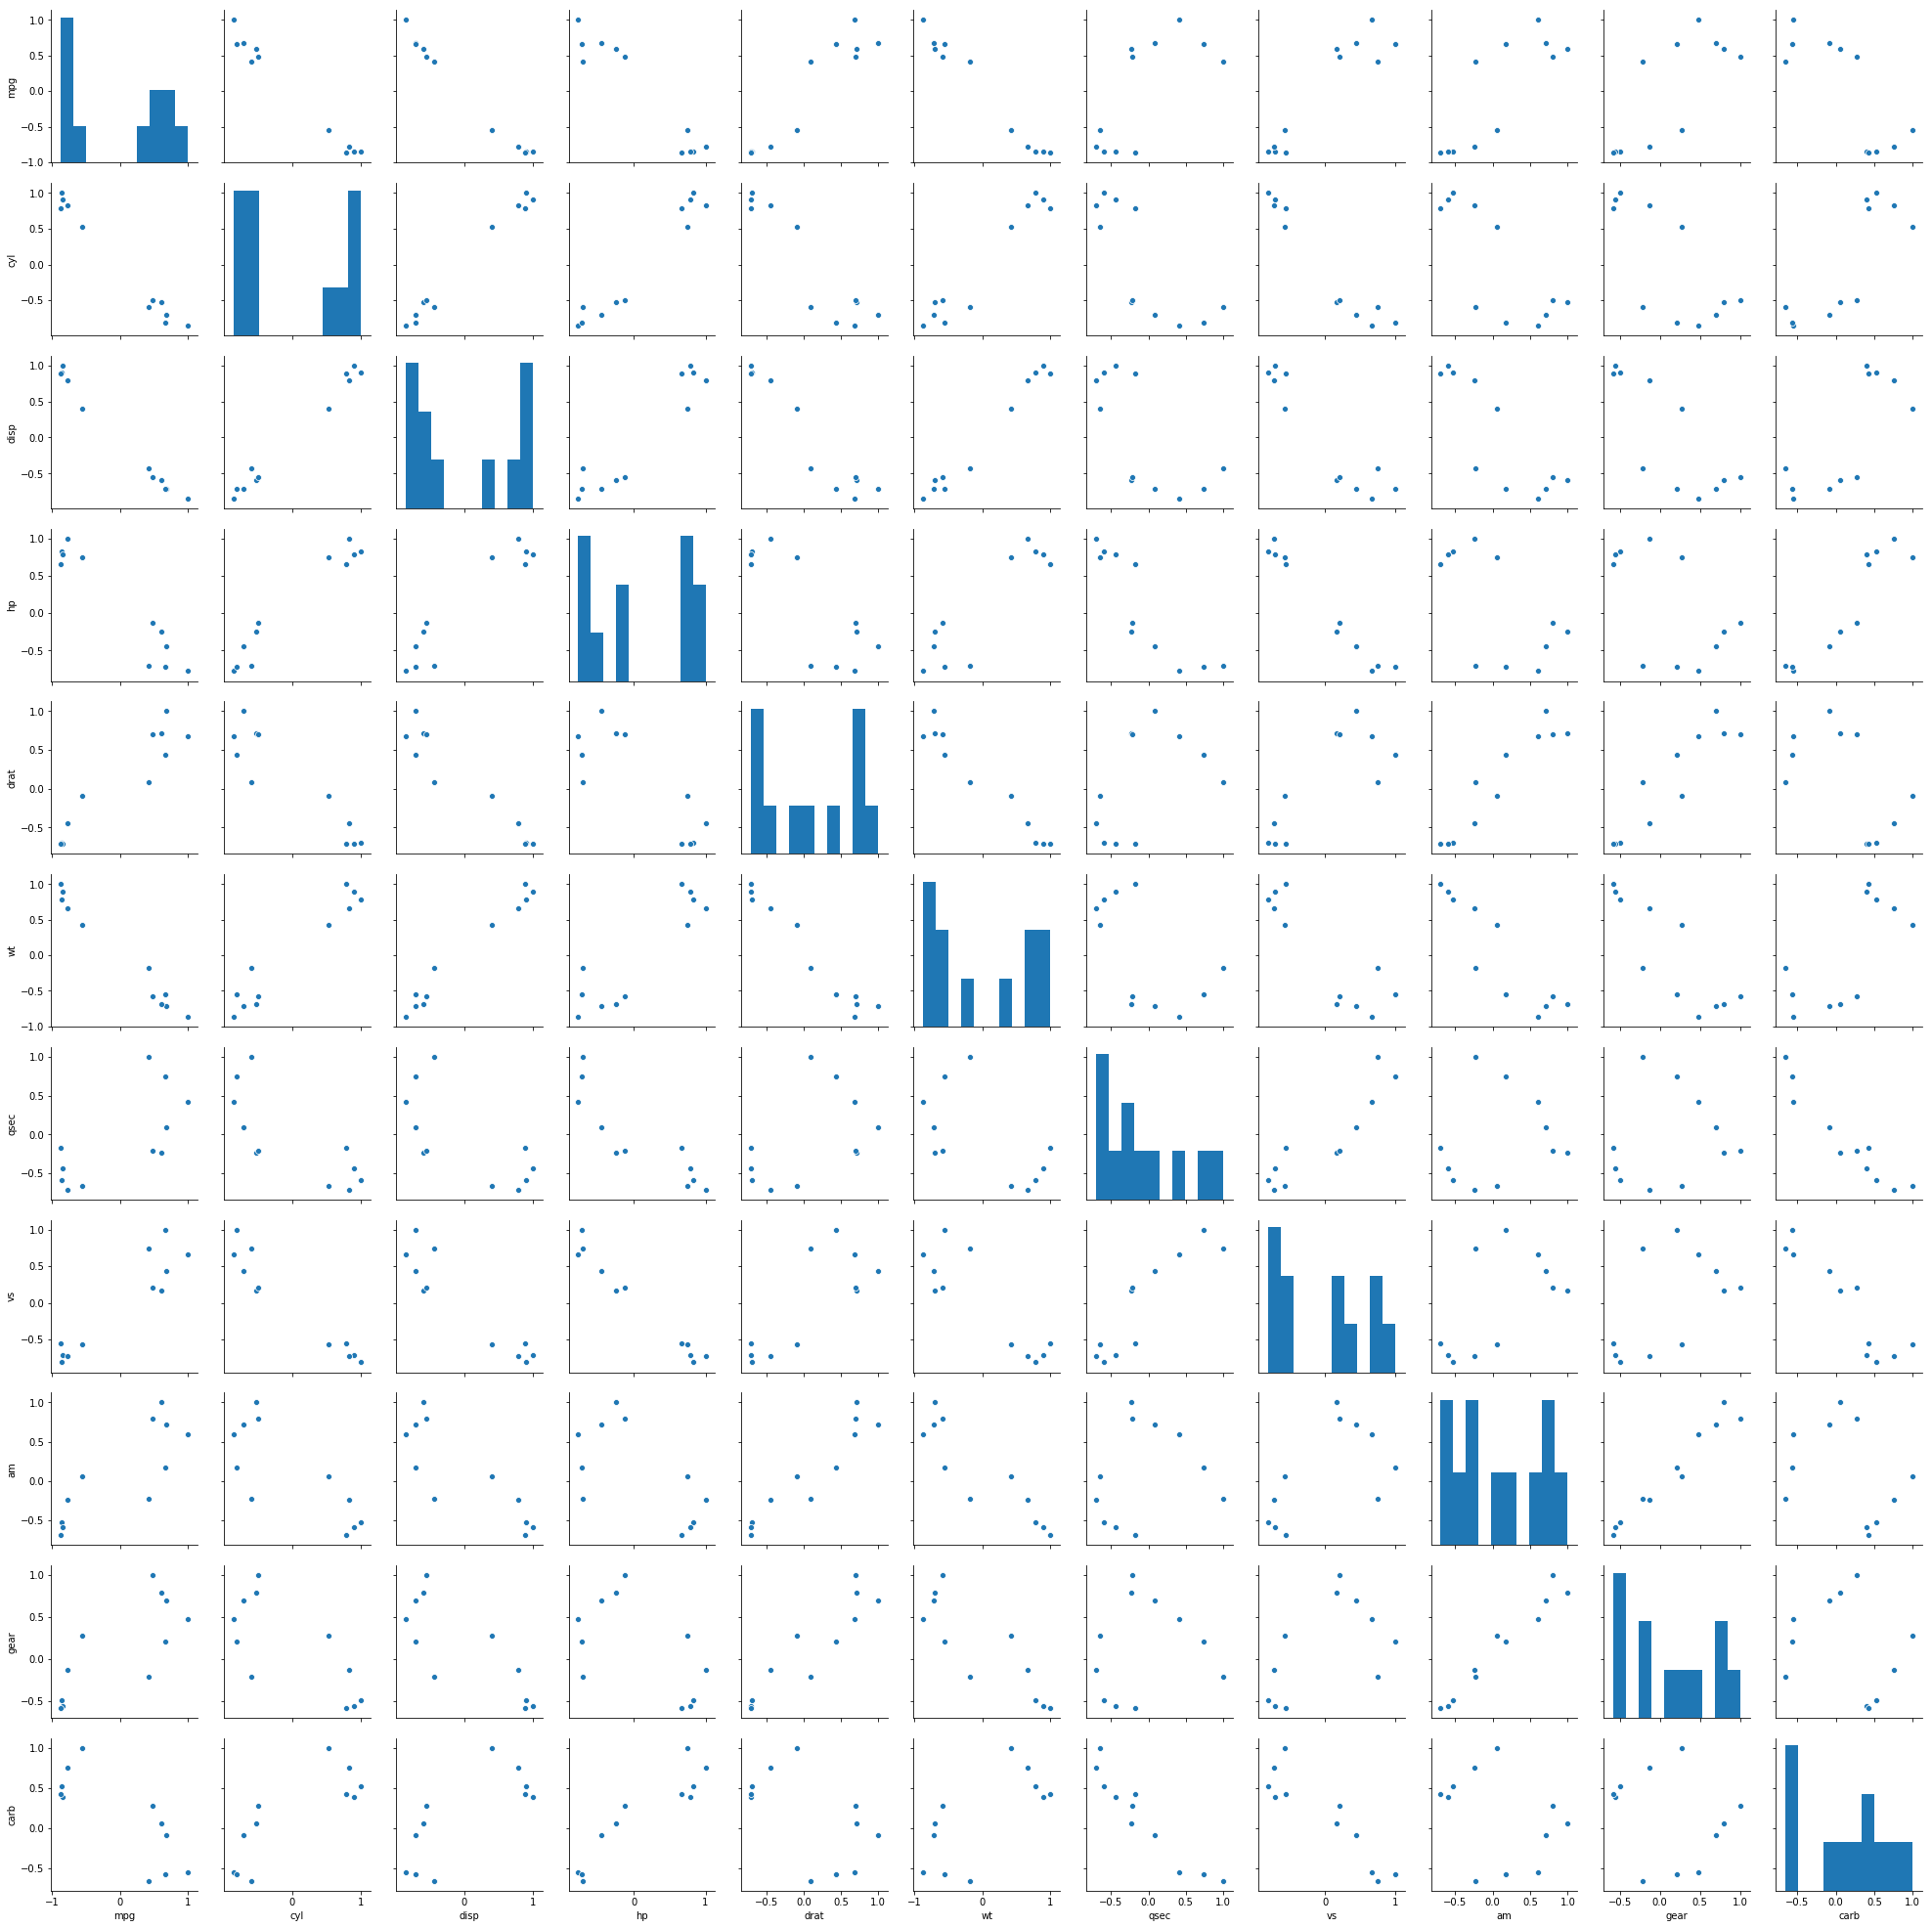

In [22]:
sns.pairplot(df.corr())

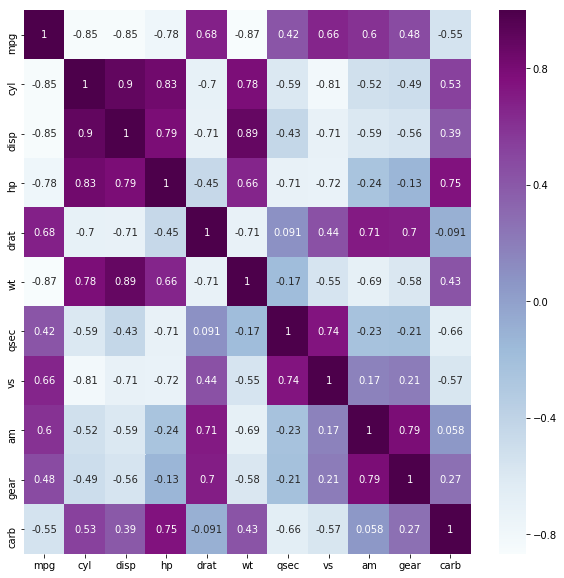

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

## Insights after EDA

1. There are outliers present in the data. To treat the outliers we will be applying transformations further.
2. There is correlation between few of the columns

# Feature Selection

## Backward Elimination -- Check for p value

In [67]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [27]:
x = df.drop('mpg',axis=1)
y = df.mpg

In [66]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
cols = list(x.columns)
pmax = 0
while(len(cols)>0):
    p = []
    x = df[cols]
    x_new = sm.add_constant(x)
    LR = sm.OLS(y,x_new).fit()
    p = pd.Series(LR.pvalues.values[1:],index=cols)
    pmax = max(p)
    feature_name = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_name)
    else:
        break
selected_feature = cols
selected_feature

['wt', 'qsec', 'am']

# Now we need to create a model for these 3 columns - Without Transformation

In [68]:
df1 = df[['wt','qsec','am']]
df1.head()

,wt,qsec,am
0,2.620,16.46,1
1,2.875,17.02,1
2,2.320,18.61,1
3,3.215,19.44,0
4,3.440,17.02,0


In [71]:
x = df1[['wt','qsec','am']]
x_constant = sm.add_constant(x)

C:\Users\KUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
LR1 = sm.OLS(y,x_constant).fit()
LR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           1.21e-11
Time:                        18:33:15   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumpption 1 - Autocorrelation

C:\Users\KUS\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


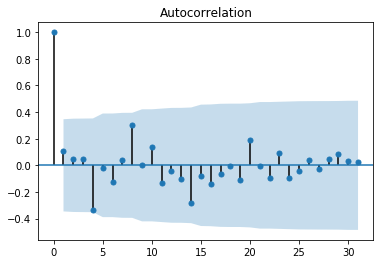

In [74]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(LR1.resid)
acf.show()

### Inference - As the DB value and the figure suggest, there is very less or no auto correlation in the data

# Assumption 2 - Normality between the Residuals

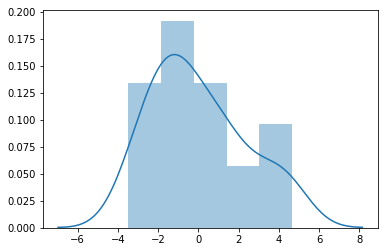

In [75]:
sns.distplot(LR1.resid)

In [76]:
from scipy import stats
stats.jarque_bera(LR1.resid)

(2.2130312498245113, 0.3307092710009132)

### Inference -- As the figure and JB value suggets the residuals are normal

# Assumption 3 -- Linearity of Residuals

In [77]:
fitted_values = LR1.predict()
resid = LR1.resid

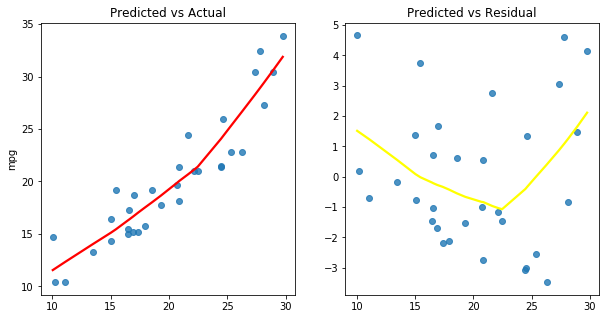

In [85]:
from pylab import *
plt.figure(figsize=(10,5))
subplot(1,2,1)
sns.regplot(x = fitted_values, y = y,lowess=True,line_kws=({'color':'red'}))
plt.title("Predicted vs Actual")
subplot(1,2,2)
sns.regplot(x = fitted_values, y = resid,lowess=True,line_kws=({'color':'yellow'}))
plt.title("Predicted vs Residual")
show()

In [86]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=LR1)

(3.4798929316519978, 0.017067831644118157)

### Inference -- As the graph and the Rainbow test suggest ... Null Hyp is rejected and hence the residuals are not linear

# Assumption 4 -- Scedasticity

In [87]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F-stat','p-val']
test = sms.het_goldfeldquandt(LR1.resid,LR1.model.exog)
lzip(name,test)

[('F-stat', 3.4417149947286054), ('p-val', 0.020852326744718583)]

### Inference -- As the pval is < 0.05 hence we reject the null hyp ... Hence the residuals are Hetero Scedastic in nature

# Assumption 5 -- Multi Collinearity

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[0:]},index=x_constant.columns)

,vif
const,1035.401710
wt,2.727922
qsec,1.420584
am,2.792352


### Inference --- As the above vif values suggest ... There is no Multi Collinearity between the columns

# Now we need to create a model for these 3 columns - With Transformation -- Applying SQRT Trans

In [93]:
df2 = df1.transform(lambda x : np.sqrt(x))
df2.head()

,wt,qsec,am
0,1.618641,4.057093,1.0
1,1.695582,4.125530,1.0
2,1.523155,4.313931,1.0
3,1.793042,4.409082,0.0
4,1.854724,4.125530,0.0


In [95]:
y = np.sqrt(y)
y.head()

0    2.140695
1    2.140695
2    2.185162
3    2.150817
4    2.079507
Name: mpg, dtype: float64

In [96]:
x = df2[['wt','qsec','am']]

In [97]:
x_constant = sm.add_constant(x)
LR2 = sm.OLS(y,x_constant).fit()
LR2.summary()

C:\Users\KUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     71.72
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           2.95e-13
Time:                        19:08:29   Log-Likelihood:                 49.068
No. Observations:                  32   AIC:                            -90.14
Df Residuals:                      28   BIC:                            -84.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8745      0.318      5.903      0.000       1.224       2.525
wt            -0.4330      0.060     -7.167      0.000      -0.557      -0.309
qsec           0.2319      0.057      4.083      0.000       0.116       0.348
am             0.0375      0.034      1.117      0.274      -0.031       0.106
==============================================================================
Omnibus:                        2.737   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.468
Skew:                           0.640   Prob(JB):                        0.291
Kurtosis:                       2.538   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference --- 

1. Here as can be seen the Adj R Sqaure has increased ... Meaning the confidence of the model has increased.
2. Also the DB value suggest that there is almost no auto - correlation between the residuals
3. From the JB value we can infer the normality of the residuals

### All in all the performance of the model has increased after the transformation

# Next Feature Selection Method 
# Recursive Feature Elimination - Works on R square

In [101]:
x = df.drop('mpg',axis=1)
y = df.mpg

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [109]:
num_ls = np.arange(1,11)
num = 0
high_score = 0
score_list = []
for i in range(len(num_ls)):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
    LR = LinearRegression()
    rfe = RFE(LR,num_ls[i])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    LR.fit(x_train_rfe,y_train)
    score = LR.score(x_test_rfe,y_test)
    print(rfe.support_)
    print(rfe.ranking_)
    print(score)
    if(score>high_score):
        high_score = score
        num = num_ls[i]
print("The highest r score is {}".format(high_score))
print("{} number of features give the best score of {}".format(num,high_score))

[False False False False  True False False False False False]
[ 5 10  9  2  1  7  8  6  3  4]
0.2765860794212318
[False False False  True  True False False False False False]
[4 9 8 1 1 6 7 5 2 3]
0.31261228682185327
[False False False  True  True False False False  True False]
[3 8 7 1 1 5 6 4 1 2]
0.31640031648331035
[False False False  True  True False False False  True  True]
[2 7 6 1 1 4 5 3 1 1]
0.10804452541369626
[ True False False  True  True False False False  True  True]
[1 6 5 1 1 3 4 2 1 1]
-0.4932742474382203
[ True False False  True  True False False  True  True  True]
[1 5 4 1 1 2 3 1 1 1]
-0.48223070819212005
[ True False False  True  True  True False  True  True  True]
[1 4 3 1 1 1 2 1 1 1]
-0.444240599833708
[ True False False  True  True  True  True  True  True  True]
[1 3 2 1 1 1 1 1 1 1]
-0.4482354676570892
[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
-0.44378475248272586
[ True  True  True  True  True  True  True  True  True

## From the above Model the Selected Features are :

## ['drat','wt','gear']

# Now we need to create a model for these 3 columns - Without Transformation

In [111]:
df3 = df[['drat','wt','gear']]
df3.head()

,drat,wt,gear
0,3.90,2.620,4
1,3.90,2.875,4
2,3.85,2.320,4
3,3.08,3.215,3
4,3.15,3.440,3


In [112]:
x = df3[['drat','wt','gear']]
x_constant = sm.add_constant(x)
y = df.mpg
LR2 = sm.OLS(y,x_constant).fit()
LR2.summary()

C:\Users\KUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     31.02
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           4.82e-09
Time:                        07:28:43   Log-Likelihood:                -78.954
No. Observations:                  32   AIC:                             165.9
Df Residuals:                      28   BIC:                             171.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5628      7.441      4.242      0.000      16.320      46.806
drat           2.2575      1.684      1.341      0.191      -1.192       5.707
wt            -4.9159      0.809     -6.073      0.000      -6.574      -3.258
gear          -1.0239      1.054     -0.971      0.340      -3.184       1.136
==============================================================================
Omnibus:                        1.776   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.483
Skew:                           0.511   Prob(JB):                        0.476
Kurtosis:                       2.743   Cond. No.                         86.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumpption 1 - Autocorrelation

C:\Users\KUS\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


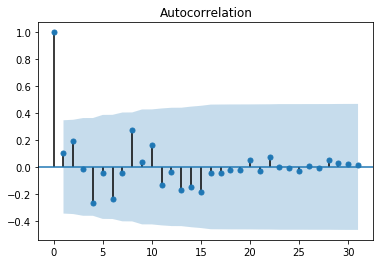

In [114]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(LR2.resid)
acf.show()

### Inference -- As the DB value and the above graph suggest, there is no or less auto correlation between the residuals.

# Assumption 2 -- Normality of Residuals

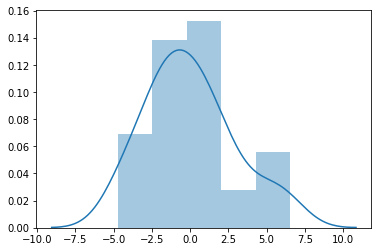

In [115]:
import seaborn as sns
sns.distplot(LR2.resid)

In [117]:
from scipy import stats
stats.jarque_bera(LR2.resid)

(1.482964298653501, 0.4764072852475121)

### Inference -- As can be seen from the graph and the JB value, the residuals follow a normal distribution.

# Assumpton 3 --- Linearity of Residuals

In [118]:
LR2.resid.mean()

-3.9190872769268026e-14

In [120]:
fitted_values = LR2.predict()
resid = LR2.resid

Text(0.5, 1.0, 'Predicted vs Residuals')

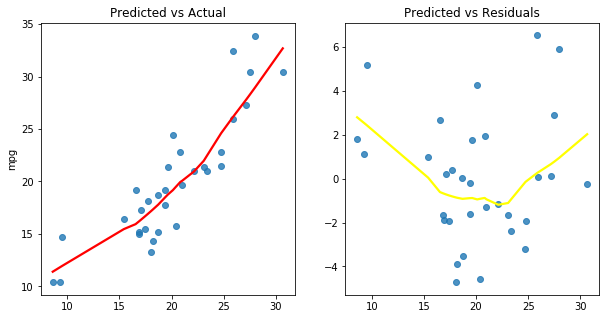

In [128]:
from pylab import *
plt.figure(figsize=(10,5))
subplot(1,2,1)
sns.regplot(x=fitted_values,y=y,lowess=True,line_kws=({'color':'red'}))
plt.title('Predicted vs Actual')
subplot(1,2,2)
sns.regplot(x=fitted_values,y=resid,lowess=True,line_kws=({'color':'yellow'}))
plt.title('Predicted vs Residuals')

In [129]:
sm.stats.diagnostic.linear_rainbow(res=LR2)

(0.8314685101878498, 0.6416427871409893)

### Inference --- From the above tests, it is clear that the residuals are linear.

# Assumption 4 -- Scedasticity

In [130]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F-stat','p-val']
test = sms.het_goldfeldquandt(LR2.resid,LR2.model.exog)
lzip(name,test)

[('F-stat', 4.734511846100613), ('p-val', 0.005820884232685661)]

### Inference --- As the p-val is < than 0.05, the null hyp is rejected and hence the residuals follow Hetero Scedasticity.

# Assumption 5 -- Multi Collinearity

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[0:]},index = x_constant.columns)

,vif
const,190.482076
drat,2.701714
wt,2.090630
gear,2.016442


### Inference --- The VIF values clearly suggest that there is no Multi Collinearity between the 3 selected features.

# Now we need to create a model for these 3 columns - With Transformation -- Applying SQRT Trans

In [136]:
df4 = df3.transform(lambda x: np.sqrt(x))
x = df4[['drat','wt','gear']]
y = np.sqrt(y)

In [137]:
x_constant = sm.add_constant(x)
LR3 = sm.OLS(y,x_constant).fit()
LR3.summary()

C:\Users\KUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     40.77
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.38e-10
Time:                        07:55:25   Log-Likelihood:                -4.7675
No. Observations:                  32   AIC:                             17.53
Df Residuals:                      28   BIC:                             23.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7875      1.481      5.260      0.000       4.755      10.820
drat           0.5843      0.655      0.892      0.380      -0.757       1.926
wt            -2.1055      0.289     -7.289      0.000      -2.697      -1.514
gear          -0.3789      0.420     -0.903      0.374      -1.239       0.481
==============================================================================
Omnibus:                        1.509   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.370
Skew:                           0.468   Prob(JB):                        0.504
Kurtosis:                       2.613   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference ---
1. Here as can be seen the Adj R Sqaure has increased ... Meaning the confidence of the model has increased.
2. Also the DB value suggest that there is almost no auto - correlation between the residuals
3. From the JB value we can infer the normality of the residuals

### All in all the performance of the model has increased after the transformation

# Final Inference ---

-- Clearly the features selected using Backward Elimination have performed well as to the features selected using Recursive Feature Selection.